# Spatiotemporal Energy Model
Acelson & Bergen 1984

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Spatial Filters: 1D

Text(0.5, 1.0, '1D Spatial Filter Quadrature Pairs')

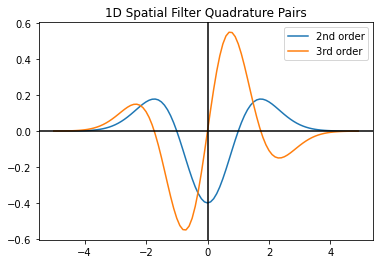

In [3]:
def spatial_filter_1d(x, order=2):
    if order == 2:
        #second derivative of gaussian
        response = (np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif order == 3:
        #third derivative of gaussian
        response = -(np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
        return
    return response
    
space = np.arange(-5,5,0.1)
response_1 = spatial_filter_1d(space, order=2)
response_2 = spatial_filter_1d(space, order=3)
plt.plot(space,response_1, label='2nd order')
plt.plot(space,response_2, label='3rd order')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("1D Spatial Filter Quadrature Pairs")

## Spatial Filters: 2D
Todo: Specify Oriented Filter Equations

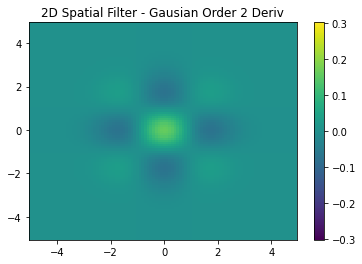

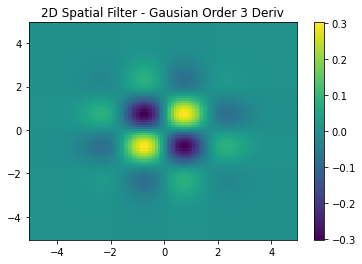

In [4]:
def spatial_filter_2d(x1, x2, order=2, oriented=False):
    if oriented:
        print('Oriented Not Yet Implmented')
        return
    else:
        if order == 2:
            #second derivative of gaussian
            x1_response = (np.exp(-(x1**2/2))*(-1+x1)*(1+x1))/np.sqrt(2*np.pi)
            x2_response = (np.exp(-(x2**2/2))*(-1+x2)*(1+x2))/np.sqrt(2*np.pi)
        elif order == 3:
            #third derivative of gaussian
            x1_response = -(np.exp(-(x1**2/2))*x1*(-3+x1**2))/np.sqrt(2*np.pi)
            x2_response = -(np.exp(-(x2**2/2))*x2*(-3+x2**2))/np.sqrt(2*np.pi)
        else:
            print('Must be 2nd or 3rd order!')
            return
            
    response = np.outer(x1_response, x2_response)
    return(response)

space_x = np.arange(-5,5,0.1)
space_y = np.arange(-5,5,0.1)
response_1 = spatial_filter_2d(space_x, space_y, order=2)
response_2 = spatial_filter_2d(space_x, space_y, order=3)
cmax=np.max((response_1,response_2))
cmin=np.min((response_1,response_2))
plt.pcolormesh(space_x, space_y, response_1, shading='auto', vmin=cmin, vmax=cmax)
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 2 Deriv")
plt.show()
plt.pcolormesh(space_x, space_y, response_2, shading='auto', vmin=cmin, vmax=cmax)
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 3 Deriv")
plt.show()

## Temporal Filters

Text(0.5, 1.0, 'Temporal Filter Quadrature Pairs')

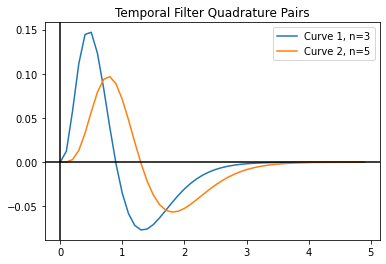

In [5]:
def temporal_filter(t, n=3, k=1):
    a = (k*t)**n
    b = np.exp(-k*t)
    c = (1/np.math.factorial(n))-((k*t)**2)/(np.math.factorial(n+2))
    return(a*b*c)

times = np.arange(0,5,0.1)
response_1 = temporal_filter(times, n=3, k=5)
response_2 = temporal_filter(times, n=5, k=5)
plt.plot(times,response_1, label='Curve 1, n=3')
plt.plot(times,response_2, label='Curve 2, n=5')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("Temporal Filter Quadrature Pairs")

## Separable Spatiotemporal Filters

/tmp/ipykernel_21864/3154889004.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times,space,st_response_1)


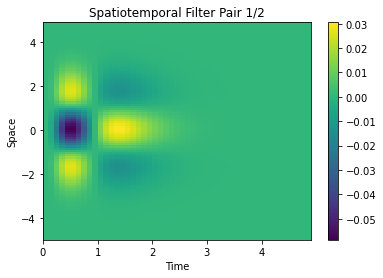

/tmp/ipykernel_21864/3154889004.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times,space,st_response_2)


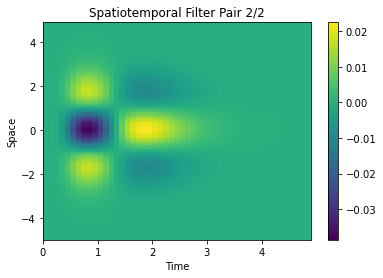

In [15]:
def spatiotemporal_filter(x,t, n=3, k=1, order=2):
    #spatial component
    if order == 2:
        #second derivative of gaussian
        spatial_response = (np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif order == 3:
        #third derivative of gaussian
        spatial_response = -(np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
    
    #temporal component
    a = (k*t)**n
    b = np.exp(-k*t)
    c = (1/np.math.factorial(n))-((k*t)**2)/(np.math.factorial(n+2))
    temporal_response = a*b*c

    #combine two
    response = spatial_response * temporal_response
    
    return response


space = np.arange(-5,5,0.1)
times = np.arange(0,5,0.1)
s,t = np.meshgrid(space,times)

#
st_response_1 = spatiotemporal_filter(s,t, n=3, k=5).T
st_response_2 = spatiotemporal_filter(s,t, n=5, k=5).T
#plot
plt.pcolormesh(times,space,st_response_1)
plt.xlabel('Time')
plt.ylabel('Space')
plt.colorbar()
plt.title("Spatiotemporal Filter Pair 1/2")
plt.show()

#plot
plt.pcolormesh(times,space,st_response_2)
plt.xlabel('Time')
plt.ylabel('Space')
plt.colorbar()
plt.title("Spatiotemporal Filter Pair 2/2")
plt.show()
